# Pandas fundamentals



## Filtering and ordering

Filtering, or conditional selection, produces a Series of True/False booleans based on the specified condition of each record.

Examples:

`df[df['column_name'] <= 100]`

`df.loc[df.column_name <= 100]`


#### Combining conditions using AND / OR logic

We can use the ampersand `(&)` to bring the two conditions together and apply `'AND'` logic, or use `(|)` to apply `'OR'` logic.

Example:

`df.loc[(df.year>2016) & (df.brand == 'Honda')]`

`df.loc[(df.year>2016) | (df.brand == 'Honda')]`


#### Using `isin` to check if the data is in the list of values

We can use `isin`

`df.loc[df.brand.isin(['Honda','Nissan','Toyota'])]`


#### Using `isnull()` and `notnull()` to find empty and non-empty data

`df.loc[df.price.isnull()]`

`df.loc[df.price.notnull()]`


In [ ]:
# FILTERING

# Filter by column value
df[df['column_name'] <= 100]

# Filter by checking if column values are in the list
specific_countries = ['Bangladesh', 'Brazil']
df[df['Country'].isin(specific_countries)]

# Filter by checking if column values contains string fragment
df[df['Country'].str.contains('United')]

# Set the DataFrame index using existing column
df2 = df.set_index('Country')

## Filtering by column names. axis = 1 - indicates we search in column names
df2.filter(items=['Continent','CCA3'], axis = 1)

## Filter by column names using 'like'
df2.filter(like = 'Pop', axis = 1) # lists all columns which names contain 'Pop'

## Filtering by row names (index). axis = 0 - indicates we search in row names
df2.filter(items=['Zimbabwe'], axis = 0)

## Filter by row names using 'like'
df2.filter(like = 'United', axis = 0)

## Filter by row name
df2.loc['Zambia']

## Filter by row position (integer)
df2.iloc[51]


# SORTING / ORDERING

# Sorting by column descending
df[df['Rank'] < 10].sort_values(by='Rank', ascending=False)

# Sorting by a few columns ascending
df[df['Rank'] < 10].sort_values(by=['Continent','Country'], ascending=True)

# Sorting by a few columns applying different ascending option to each sorted column
df[df['Rank'] < 10].sort_values(by=['Continent','Country'], ascending=[True,False])

## Indexing

Index is an object that stores the access labels for all Pandas objects.

In [ ]:
# specifying custom index

# Set the DataFrame index using existing column
df = df.set_index('Country')

## Set the DataFrame index using existing column without saving df to a variable using 'inplace = True'
## if use w/o inplace=True, changes won't save
df.set_index('Country', inplace = True)

# Alternative way to set custom index while reading file
df = pd.read_csv("world_population.csv", index_col = "Country")

# Importing dataset to pandas dataframe with Date column, making index to be the Date column, and parse each index value as Date
pd.read_csv("path_to_dataset_file", index_col="Date", parse_dates=True)

# Reset the index. inplace=True means modifying existing dataframe instead of creating a new one
df.reset_index(inplace=True)

# Setting multi-index. In the example below, two columns 'Continent' and 'Country' will be the index
df.set_index(['Continent', 'Country'], inplace=True)

# Sort index
df.sort_index()
df.sort_index(ascending=False) # in descending order
df.sort_index(ascending=[False, True]) # specify different sorting order for different indexes

# Accessing elements using loc and iloc in multi-indexed dataframe
df.loc['Africa', 'Angola'] # searching for 'Africa' as a continent and 'Angola' as a country
df.iloc[0] # even in case of multi-indexed dataframe will be lookup rows using initial integer-based index


## Indexing, Selecting & Assigning

Two valid ways of accessing fields in Pandas dataframe:
 - `df.column_name`. For example, `pd.country`. It won't work if there spaces and other symbols in column name. In this regard, using [] approach is safer.
 - `df['column_name']`. For example, `pd['country']`

Pandas Dataframe represents the whole dataset, whereas pandas Series represents a column of it.

Indexing operator `[]` can be used to access single specific value of a column,
for example 
`reviews['country'][0]`


### Indexing in Pandas
Using pandas accessor operators, `loc` and `iloc`.
Both `loc` and `iloc` are row-first, column-second.

`loc` and `iloc` use slightly different indexing schemes:
 - `iloc` - the first element of the range is included and the last one excluded. So `0:10` will select entries `0,...,9`
 - `loc` - the first element of the range is included and the last one is included. So `0:10` will select entries `0,...,10`

Otherwise, the semantics of using `loc` are the same as those for `iloc`.

Two paradigms for attribute selection:
 - index-based selection
 - label-based selection


#### index-based selection
Selecting data based on its numerical position in the data. `iloc` follows this paradigm.

When we use `iloc` we treat the dataset like a big matrix (a list of lists), one that we have to index into by position.

`df.iloc[row_index, column_index]` - general format

`df.iloc[0]` - selects the first row of data in a DataFrame

`df.iloc[:, 0]` - selects the first column of data in a DataFrame

`df.iloc[:3, 0]` - selects the first three rows from the first column in a DataFrame

`df.iloc[1:3, 2]` - selects the second and third entries from the third column in a DataFrame

It's also possible to pass a list:
`df.iloc[[1,2,3,5,8]]` - selects rows with indexes 1, 2, 3, 5, and 8 
`df.iloc[[5, 7, 11], 4]` - selects the 6th, 8th, and 12th rows from the 5-th column in a DataFrame
`df.loc[[0,1,10,100], ['country','province','region_1','region_2']]` - selects rows with indexes 0, 1, 10, 100 from columns 'country','province','region_1','region_2'.

Negative numbers can be used in selection. 
This will start counting forwards from the end of the values. 

`df.iloc[-5:]` - selects the last five elements of the dataset
`df.iloc[-5:, 4]` - selects the last five elements from the 5-th column of the dataset


#### Label-based selection
The second paradigm for attribute selection. It uses the `loc` operator. In this paradigm, it's the data index value, not its position. So, `loc` uses the information in the indices to do its work.

`df.loc[0, 'column_name']` - get the first entry from the column in data frame

`df.loc[:4, ['col_name1', 'col_name2', 'col_name3']]` - gets the first four rows for specified column names



### Assigning data

#### Assigning a constant value

`df['column_name'] = 'value'`
Each row in the column will have this value

#### Assigning an iterable of values

`df['index_backwards'] = range(len(df), 0, -1)`


### Other

`idxmax()` - method used to find the index label of the first occurrence of the maximum value in a pandas Series or DataFrame. It returns the index label of the row that contains the maximum value.

`max_index = df['column_name'].idxmax()`

`df.loc[max_index, 'another_column_name']`
This combination can be used to solve such tasks as "Find the attribute of the dataset with the highest another attribute in the dataset.

## Summary Functions and Maps

### Some summary functions

`df.column_name.mean()` - calculates the mean for the column

`df.column_name.median()` - calculates the median for the column

`df.column_name.unique()` - shows a list of unique values in the column

`df.column_name.nunique()` - shows the number of unique values in the column

`df.column_name.value_counts()` - shows a list of unique values and how often they occur in the dataset


### Maps

Map is a function that takes one set of values and "maps" them to another set of values. 

There are two mapping methods:
 - `map()`
 - `apply()`

`map()` and `apply()` return new, transformed Series and DataFrames, respectively. They don't modify the original data they're called on. 

#### Using `map()`
For example, suppose that we wanted to remean the scores the wines received to 0. We can do this as follows:

`review_points_mean = reviews.points.mean()`
`reviews.points.map(lambda p: p - review_points_mean)`

The function you pass to `map()` should expect a single value from the Series (a point value, in the above example), and return a transformed version of that value. 
`map()` returns a new Series where all the values have been transformed by your function.


#### Using `apply()`
`apply()` is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row.

```
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

reviews.apply(remean_points, axis='columns')
```

If we had called `reviews.apply()` with `axis='index'`, then instead of passing a function to transform each *row*, we would need to give a function to transform each *column*.


#### Other
Pandas provides many common mapping operations as built-ins. For example, here's a faster way of remeaning our points column:

```
review_points_mean = reviews.points.mean()
reviews.points - review_points_mean
```

In this code we are performing an operation between a lot of values on the left-hand side (everything in the Series) and a single value on the right-hand side (the mean value).


An easy way of combining `country` and `region` information in the dataset would be to do the following:

`reviews.country + " - " + reviews.region_1`

`df.brand + ' ' + df.model_name`

`df.price * 2`


## Group by and Aggregating

In [ ]:
# Group by 'Base Flavor' field and calculate 'mean' for all integer fields in the dataframe
df.groupby('Base Flavor').mean()

# size() vs count()
## size() method calculates the total number of records within each group, including both non-null and null values, 
## count() method calculates the number of non-null values within each group.
### Group by 'Base Flavor' field and calculate 'count' for all fields in the dataframe
df.groupby('Base Flavor').count()
### Group by column_name and calculate the number of entries in each group
df.groupby('column_name').size()

# Group by column_name, calcuate count for each group and sort values in descending order
df.groupby('column_name').size().sort_values(ascending=False)

# Group by 'Base Flavor' field and calculate 'min' for all fields in the dataframe.
## for string values it shows first value in the alphabetical order
df.groupby('Base Flavor').min()

# Group by 'Base Flavor' field and calculate 'max' for all fields in the dataframe.
## for string values it shows last value in the alphabetical order
df.groupby('Base Flavor').max()

# Group by 'Base Flavor' field and calculate 'sum' for all integer fields in the dataframe
df.groupby('Base Flavor').sum()

# Group by 'Base Flavor' field and calculate 'mean' for the 'Flavor Rating' field
df.groupby('Base Flavor')['Flavor Rating'].mean()

# Using `agg()` method - allows to run a bunch of different functions on DataFrame simultaneously
## for example, generate a simple statistical summary of the dataset as follows:
df.groupby(['column_name']).column_name.agg([len, min, max])

# General syntax of grouping and aggregating
df.groupby('column_name').agg({'column_name': 'aggregation_function_name'})
## for example.
df.groupby('Base Flavor').agg({'Total Rating': 'max'})

## Making several aggregation functions at once 
df.groupby('Base Flavor').agg({'Total Rating': ['mean','max','count','sum']})

## Making several aggregation functions for several fields at once 
df.groupby('Base Flavor').agg({'Total Rating': ['mean','max','count','sum'], 'Flavor Rating': ['mean','max','count','sum']})

## Grouping by several fields and making several aggregation functions for several fields at once
df.groupby(['Base Flavor','Liked']).agg({'Total Rating': ['mean','max','count','sum'], 'Flavor Rating': ['mean','max','count','sum']})

## Using describe() function to show general statistics for the grouped dataframe
df.groupby(['Base Flavor']).describe()

## Example: selecting the name of the first wine reviewed from each winery in the vines dataset
df.groupby('winery').apply(lambda x: x.title.iloc[0])

## Example: pick out the wine with max score by country and province
df.groupby(['country', 'province']).apply(lambda x: x.loc[x.points.idxmax()])


## Renaming



In [ ]:
# Rename dataframe column name
df.rename(columns={'old_column_name': 'new_column_name'})

# Rename two columns in dataframe at once
df.rename(columns={'old_column1_name': 'new_column1_name', 'old_column2_name': 'new_column2_name'})
df.rename(columns=dict(old_column1_name='new_column1_name', old_column2_name='new_column2_name')) 

# Rename first two entries of index
df.rename(index={0: 'firstEntry', 1: 'secondEntry'})

# Rename the name attribute for row index and the column index 
df.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

## Merge, Join, and Concatenate dataframes in Pandas

![image.png](./image.png)

In [ ]:
# MERGE #

## The default join type in merge() is an inner join, which keeps only the rows with matching keys in both DataFrames.

# Merging two dataframes, df1 and df2, using inner join and one common field 'FellowshipID'
df1.merge(df2, how = 'inner', on = 'FellowshipID')

# Merging two dataframes, df1 and df2, using inner join and two common fields, 'FellowshipID' and 'FirstName'
df1.merge(df2, how = 'inner', on = ['FellowshipID', 'FirstName'])
## the same result can be achieved by using `df1.merge(df2)` command. It's possible due to default values in the function

# Merging two dataframes, df1 and df2, using inner join and columns from both dataframes
df1.merge(df2, how='inner', left_on='df1_column', right_on='df2_column')

# Merging two dataframes, df1 and df2, using outer join
df1.merge(df2, how = 'outer')

# Merging two dataframes, df1 and df2, using left join
df1.merge(df2, how = 'left')

# Merging two dataframes, df1 and df2, using right join
df1.merge(df2, how = 'right')

# Merging two dataframes, df1 and df2, using cross join that returns the Cartesian product of rows from the tables in the join. 
# In other words, it combines each row from the first table with each row from the second table
df1.merge(df2, how = 'cross')


# JOIN #
## join() lets combine different DataFrame objects which have an index in common

## The default join type in join() is a left join.
## Functions the same as 'merge', but has a bit trickier syntax. So, it might be easier to use 'merge' for joins.

# Joining two dataframes, df1 and df2. 'how' specifies type of join, 'inner', 'outer', 'left', 'right', 'cross'
df3 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_Left', rsuffix = '_Right', how = 'inner')


# CONCATENATE #

## As opposed to 'join' and 'merge', 'concat' combines one dataframe on top of another, functioning similar to
## 'UNION ALL' in SQL

# Combining two dataframes, df1 and df2.
pd.concat([df1, df2])

## Parsing Dates

In most cases, parsing dates means converting from string representation to actual date format supported by pandas.

The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

To parse dates, we should `import datetime`

Some examples:

* `1/17/07` has the format `"%m/%d/%y"`
* `17-1-2007` has the format `"%d-%m-%Y"`

```
df['date_parsed'] = pd.to_datetime(df['date'], format="%m/%d/%y")
```

What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you can have pandas try to infer what the right date format should be. You can do that like so:
```
df['date_parsed'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
```

Why don't you always use `infer_datetime_format = True`? 
There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.


Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

```
# get the day of the month from the date_parsed column
day_of_month_df = df['date_parsed'].dt.day
```

Sometimes, it might happen that you mixed days with months in a date. One of the ways to double-check this, plot a histogram of the days of the month. We expect it to have values between 1 and 31
```
# plot the day of the month
sns.distplot(day_of_month_df, kde=False, bins=31)
```

### Other tips

Useful method to check length of date column in dataframe to ensure data consistency. 
```
date_lengths = df.Date.str.len()
date_lengths.value_counts()
```

If there are some inconsitent values with different lengths, we can locate them as follow:
```
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
df.loc[indices]
```
Then to fix them:
```
df.loc[3378, "Date"] = "02/23/1975"
```

## Data Visualization

Three broad categories of chart types:
 - Trends
 - Relationship
 - Distribution

**Trends** - A trend is defined as a pattern of change.
 - `sns.lineplot` - **Line charts** are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.


**Relationship** - There are many different chart types that you can use to understand relationships between variables in your data.
 - `sns.barplot` - **Bar charts** are useful for comparing quantities corresponding to different groups.
 - `sns.heatmap` - **Heatmaps** can be used to find color-coded patterns in tables of numbers.
 - `sns.scatterplot` - **Scatter plots** show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
 - `sns.regplot` - Including a **regression line** in the scatter plot makes it easier to see any linear relationship between two variables.
 - `sns.lmplot` - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
 - `sns.swarmplot` - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.

**Distribution** - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
 - `sns.histplot` - **Histograms** show the distribution of a single numerical variable.
 - `sns.kdeplot` - **KDE plots** (or **2D KDE plots**) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
 - `sns.jointplot` - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.
 
### Change the style
Seaborn has five different themes:
 - "darkgrid"
 - "whitegrid"
 - "dark"
 - "white"
 - "ticks"

Change the style of the figure to the "dark" theme

`sns.set_style("dark")`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shows available plot design styles from plt module
print(plt.style.available)

# Applying selected style to plots
plt.style.use('seaborn')

# Creating a plot. By default, line plot type is created
df.plot()
df.plot(kind = 'line') # the same

# Creating line chart with seaborn
## Set the width and height of the figure in inches
plt.figure(figsize=(14,6))
## Add title
plt.title("Title for chart")
# Add label for horizontal axis
plt.xlabel("X axis label")
## Create line chart
sns.lineplot(data=dataframe)
## Creating line chart for one selected column
sns.lineplot(data=df['column_name'], label="label for chart")

# Creating a series of plots using 'subplots' parameter
df.plot(kind = 'line', subplots = True)

# Creating a plot with title
df.plot(kind = 'line', title = 'Ice Cream Ratings')

# Creating a line plot with title, xlabel, ylabel
df.plot(kind = 'line', title = 'Ice Cream Ratings', xlabel = 'Date', ylabel = 'Scores')

# CREATING BAR CHARTS
# Creating bar chart
df.plot(kind='bar')

## Creating stacked bar chart
df.plot(kind='bar', stacked = True)

## Creating bar chart for one field 'Flavor Rating'
df['Flavor Rating'].plot(kind='bar', stacked = True)

## Creating horizontal stacked bar chart
df.plot(kind='barh', stacked = True)

## Creating bar chart with seaborn
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Add title
plt.title("Chart Title")
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data_for_x, y=data_for_y)
# Add label for vertical axis
plt.ylabel("Label for y axis")

# Creating scatter plot
## Requires two variables, 'x' and 'y'. s - size, c - color; optional parameters
df.plot.scatter(x = 'Texture Rating', y = 'Overall Rating', s = 300, c = 'green')

# Creating scatter plot with seaborn
sns.scatterplot(x=df.column_1, y=df.column_2)
## Double-check the strength of relationship by adding regression line, or the line that best fits the data.
sns.regplot(x=df.column_1, y=df.column_2)
## Color-coded scatter plots enable to display relationships between three variables
sns.scatterplot(x=df.column_1, y=df.column_2, hue=df.column_3)
## Add several regression lines for each group based on column_name3 values
sns.lmplot(x="column_name1", y="column_name2", hue="column_name3", data=dataframe)
## Categorical scatter plot. To feature a categorical variable (like "smoker", Yes or No)
sns.swarmplot(x=df.column_1, y=df.column_2)

# Creating histogram
## by default, bins = 10
df.plot.hist(bins = 20)

# Creating histogram with seaborn
sns.histplot(df.column_name)

# Creating boxplot
df.plot.box()

# Creating areaplot
df.plot.area()
df.plot.area(figsize = (10,4)) # changing size of the plot area to make it bigger

# Creating pie chart
df.plot.pie(y = 'Flavor Rating')
df.plot.pie(y = 'Flavor Rating', figsize = (10,6))

# Creating heatmap with seaborn
## Set the width and height of the figure
plt.figure(figsize=(14,7))
## Add title
plt.title("Heatmap Title")
## Heatmap. ## annot=True - to ensure that the values for each cell appear on the chart. 
## (Leaving this out removes the numbers from each of the cells!)
sns.heatmap(data=heatmap_data, annot=True)
## Add label for horizontal axis
plt.xlabel("X label")

# Creating density plots with seaborn
## Creating kernel density estimate (KDE). It's like a smoothed histogram.
sns.kdeplot(data=df.column_name, fill=True) # fill=True colors the area below the curve
## 2D KDE plots with 2 columns
sns.jointplot(x=df.column_name_1, y=df.column_name_2, kind="kde")
## Color-coded plots
# data= provides the name of the variable that we used to read in the data
# x= sets the name of column with the data we want to plot
# hue= sets the column we'll use to split the data into different histograms
sns.histplot(data=df, x='column_name_1', hue='column_name_2')
## Color-coded kde plots
sns.kdeplot(data=df, x='column_name_1', hue='column_name_2', fill=True)


In [3]:
df = pd.read_csv('Ice Cream Ratings.csv')
df = df.set_index('Date')
df

,Flavor Rating,Texture Rating,Overall Rating
Date,,,
1/1/2022,0.223090,0.040220,0.600129
1/2/2022,0.635886,0.938476,0.106264
1/3/2022,0.442323,0.044154,0.598112
1/4/2022,0.389128,0.549676,0.489353
1/5/2022,0.386887,0.519439,0.988280
1/6/2022,0.877984,0.193588,0.832827
1/7/2022,0.140995,0.325110,0.105147


In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: title={'center': 'Ice Cream Ratings'}, xlabel='Date', ylabel='Scores'>

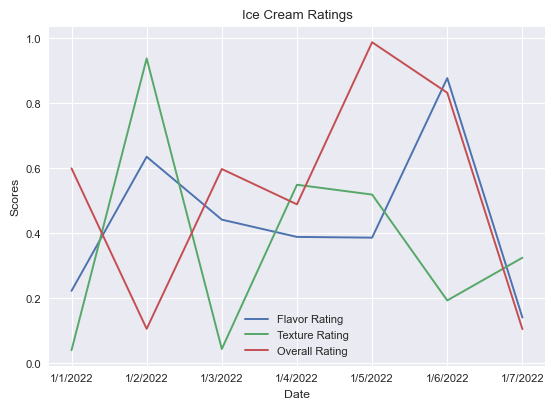

In [17]:
plt.style.use('seaborn-v0_8-paper')
df.plot(kind = 'line', title = 'Ice Cream Ratings', xlabel = 'Date', ylabel = 'Scores')

<Axes: ylabel='Date'>

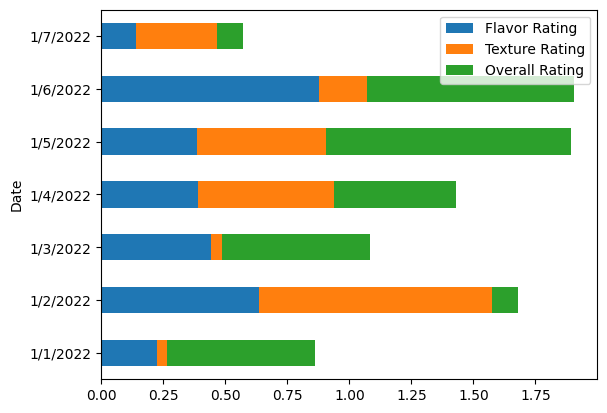

In [5]:
df.plot(kind='barh', stacked = True)

<Axes: xlabel='Texture Rating', ylabel='Overall Rating'>

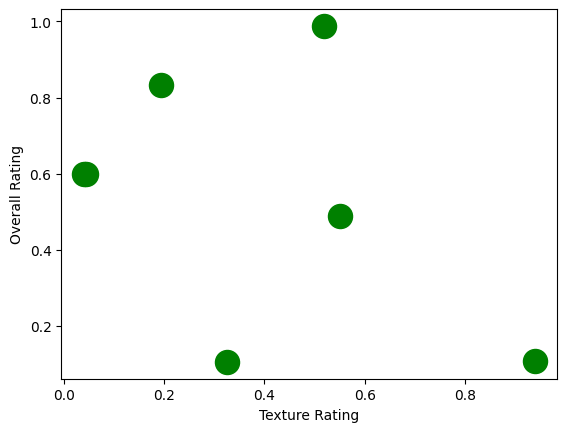

In [6]:
df.plot.scatter(x = 'Texture Rating', y = 'Overall Rating', s = 300, c = 'green')